In [4]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk

# Download necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
data = pd.read_csv("/content/Dataset .csv")

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Preprocessing function
pre = lambda t: [w for w in word_tokenize(t.lower().translate(str.maketrans("", "", string.punctuation))) if w not in stopwords.words('english')]

# Lists to store tokens
pos, neg = [], []

# Process each text entry
for t in data['Rating text'].astype(str):
    tokens = pre(t)
    score = sia.polarity_scores(t)['compound']
    (pos if score >= 0.05 else neg).extend(tokens)

# Word counts for positive and negative tokens
pos_wc, neg_wc = pd.Series(pos).value_counts(), pd.Series(neg).value_counts()

# Display most common positive and negative keywords
print("Most common positive keywords:")
print(pos_wc.head(10))

print("\nMost common negative keywords:")
print(neg_wc.head(10))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common positive keywords:
good         3179
excellent     301
Name: count, dtype: int64

Most common negative keywords:
average    3737
rated      2148
poor        186
Name: count, dtype: int64


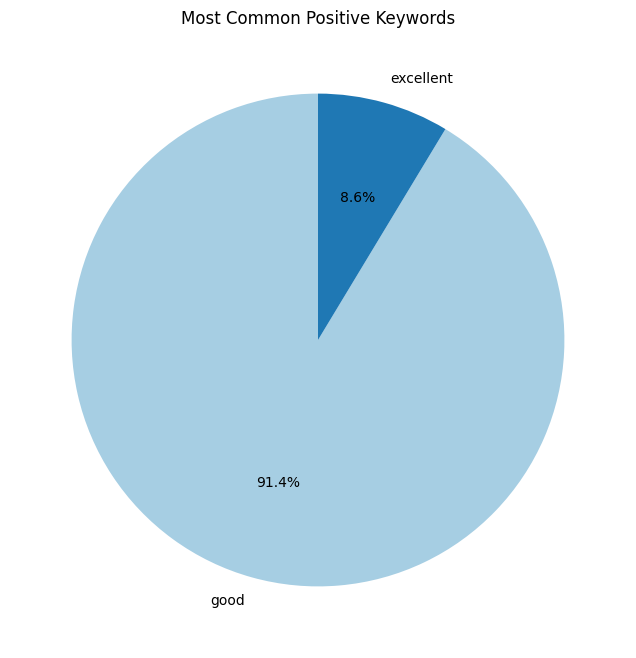

In [7]:
import matplotlib.pyplot as plt

# Plot the most common positive keywords as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    pos_wc.head(10),
    labels=pos_wc.head(10).index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors[:10]  # Use the first 10 colors
)
plt.title('Most Common Positive Keywords')
plt.show()


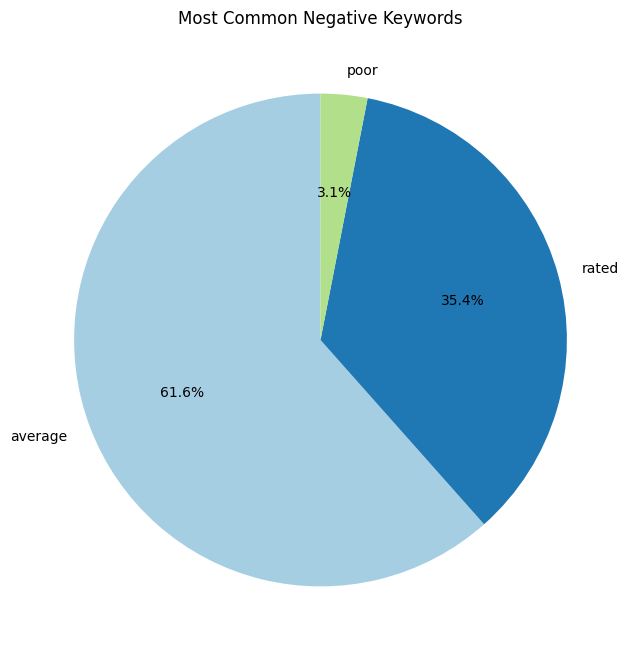

In [8]:
plt.figure(figsize=(8, 8))
plt.pie(neg_wc.head(10), labels=neg_wc.head(10).index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Most Common Negative Keywords')
plt.show()

In [10]:
# Calculate review length and average length
data['Review Length'] = data['Rating text'].apply(lambda text: len(nltk.word_tokenize(str(text))))
avg_length = data['Review Length'].mean()
print(f"Average Review Length: {avg_length:.2f} words")

# Display the relationship between review length and rating
print("\nRelationship between Review Length and Rating:")
print(data.groupby('Aggregate rating')['Review Length'].mean())


Average Review Length: 1.34 words

Relationship between Review Length and Rating:
Aggregate rating
0.0    2.0
1.8    1.0
1.9    1.0
2.0    1.0
2.1    1.0
2.2    1.0
2.3    1.0
2.4    1.0
2.5    1.0
2.6    1.0
2.7    1.0
2.8    1.0
2.9    1.0
3.0    1.0
3.1    1.0
3.2    1.0
3.3    1.0
3.4    1.0
3.5    1.0
3.6    1.0
3.7    1.0
3.8    1.0
3.9    1.0
4.0    2.0
4.1    2.0
4.2    2.0
4.3    2.0
4.4    2.0
4.5    1.0
4.6    1.0
4.7    1.0
4.8    1.0
4.9    1.0
Name: Review Length, dtype: float64


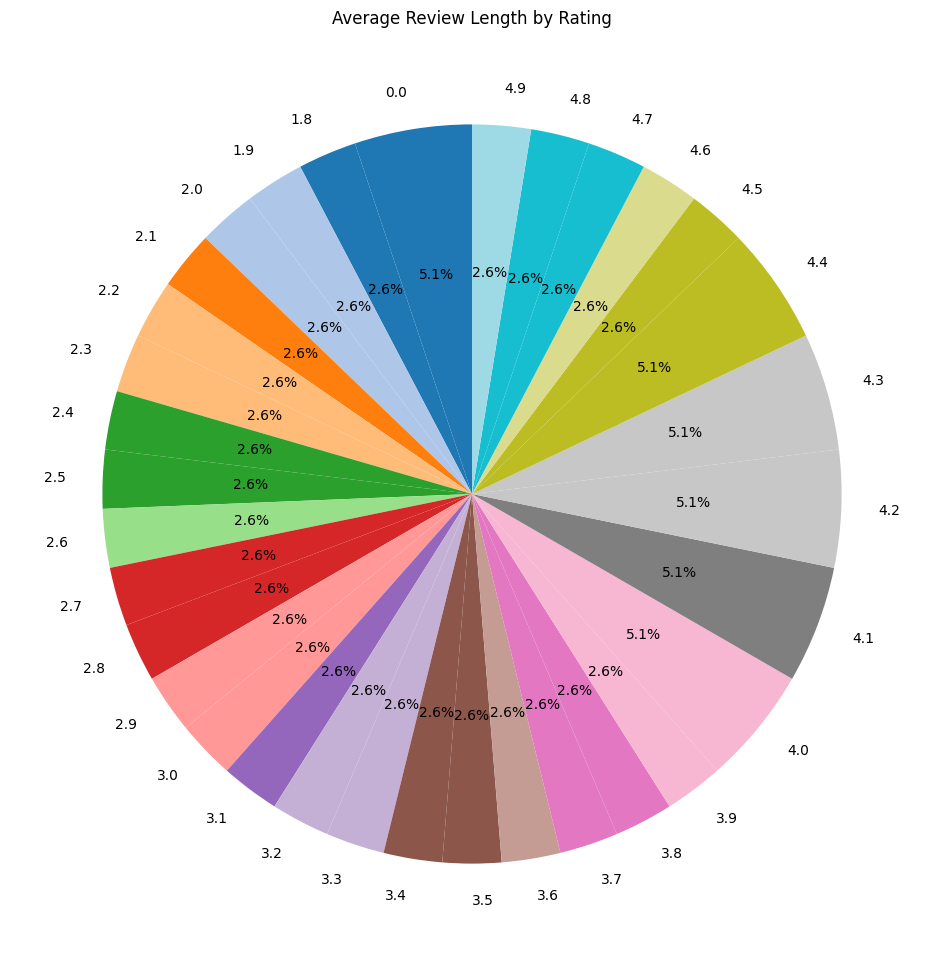

In [13]:
# Calculate the average review length by rating
rating_vs_length = data.groupby('Aggregate rating')['Review Length'].mean()

# Plotting a pie chart with different colors
plt.figure(figsize=(12, 12))
plt.pie(
    rating_vs_length,
    labels=rating_vs_length.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[plt.cm.tab20(i / len(rating_vs_length)) for i in range(len(rating_vs_length))]
)
plt.title('Average Review Length by Rating')
plt.show()

